In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/project/Dataset_Ads.csv')

In [6]:
df.head(5)

,Age,Gender,Income,Location,Ad Type,Ad Topic,Ad Placement,Clicks,Click Time,Conversion Rate,CTR
0,61,Male,35717.43,Urban,Banner,Travel,Social Media,3,2024-01-18 20:45:56.898459,0.0981,0.0737
1,41,Male,47453.25,Rural,Video,Travel,Search Engine,5,2023-04-24 20:45:56.898459,0.0937,0.0592
2,49,Female,68126.35,Rural,Text,Food,Social Media,4,2024-02-24 20:45:56.898459,0.1912,0.0563
3,68,Female,64585.73,Suburban,Text,Health,Website,6,2023-12-13 20:45:56.898459,0.1122,0.0232
4,63,Male,21109.40,Urban,Native,Fashion,Search Engine,5,2023-07-02 20:45:56.898459,0.1426,0.0539


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Income           10000 non-null  float64
 3   Location         10000 non-null  object 
 4   Ad Type          10000 non-null  object 
 5   Ad Topic         10000 non-null  object 
 6   Ad Placement     10000 non-null  object 
 7   Clicks           10000 non-null  int64  
 8   Click Time       10000 non-null  object 
 9   Conversion Rate  10000 non-null  float64
 10  CTR              10000 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 859.5+ KB


In [ ]:
df.describe()
print(df.isna().sum())
# Wow! No missing data. How the helly did they make this? Whatever I guess.


Age                0
Gender             0
Income             0
Location           0
Ad Type            0
Ad Topic           0
Ad Placement       0
Clicks             0
Click Time         0
Conversion Rate    0
CTR                0
dtype: int64


In [ ]:
# Great piece of code here wow.
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")
    if unique_vals < 15:  # show actual values if few
        print(df[col].unique(), "\n")


Age: 100 unique values
Gender: 3 unique values
['Male' 'Female' 'Other'] 

Income: 9994 unique values
Location: 3 unique values
['Urban' 'Rural' 'Suburban'] 

Ad Type: 4 unique values
['Banner' 'Video' 'Text' 'Native'] 

Ad Topic: 6 unique values
['Travel' 'Food' 'Health' 'Fashion' 'Technology' 'Finance'] 

Ad Placement: 3 unique values
['Social Media' 'Search Engine' 'Website'] 

Clicks: 17 unique values
Click Time: 6503 unique values
Conversion Rate: 3955 unique values
CTR: 1008 unique values


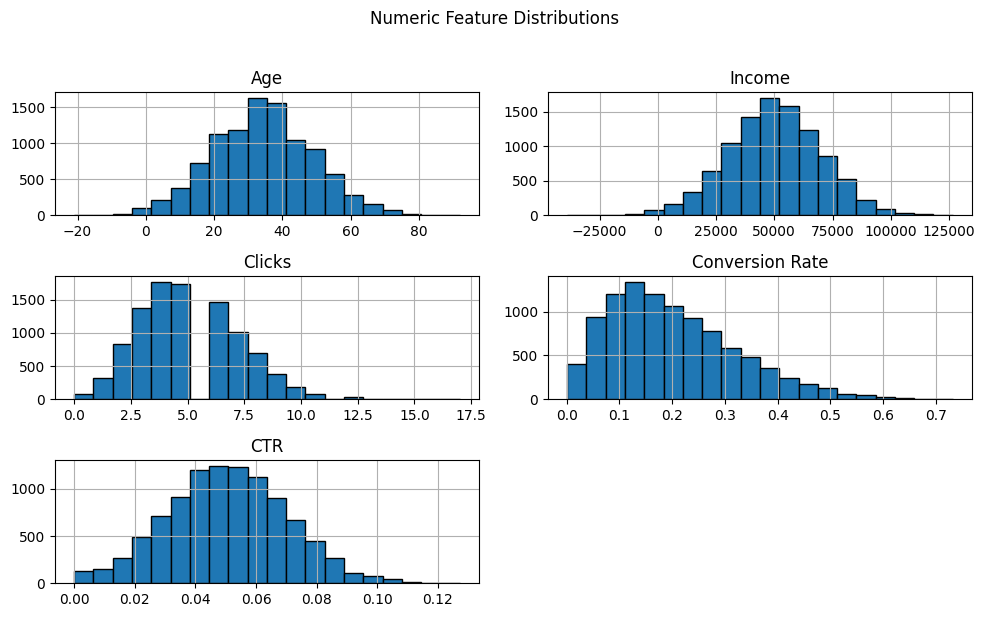

In [ ]:
# okay this is good cause I need to see the distribution.
numeric_cols = ['Age', 'Income', 'Clicks', 'Conversion Rate', 'CTR']

df[numeric_cols].hist(bins=20, figsize=(10,6), edgecolor='black')
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()


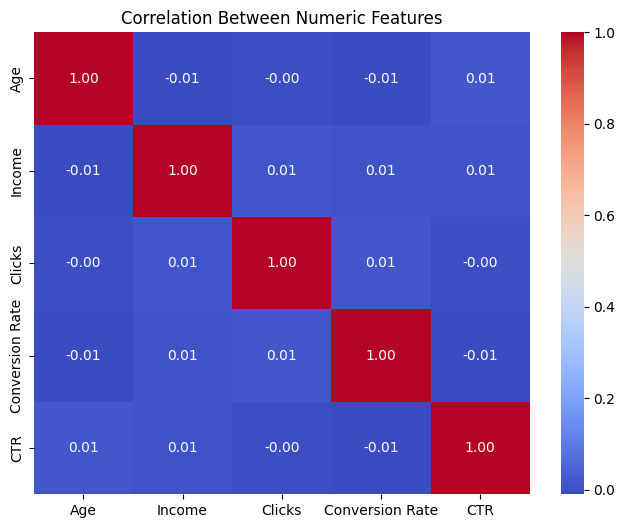

In [ ]:
# This one is hard to understand tbh
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

C:\Users\n0308g\AppData\Local\Temp\1\ipykernel_21268\1208691405.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Income', palette='pastel')


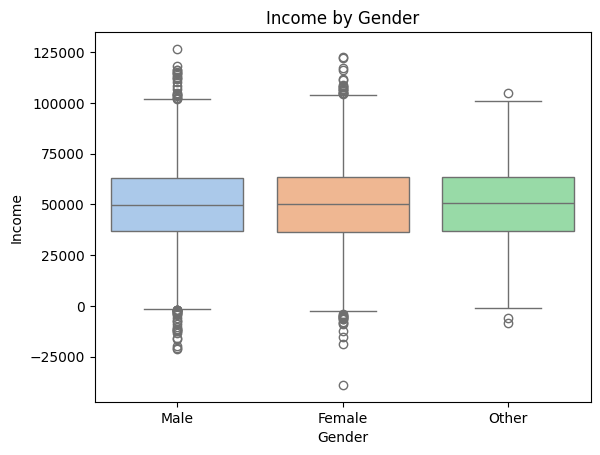

C:\Users\n0308g\AppData\Local\Temp\1\ipykernel_21268\1208691405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Ad Type', y='CTR', palette='pastel')


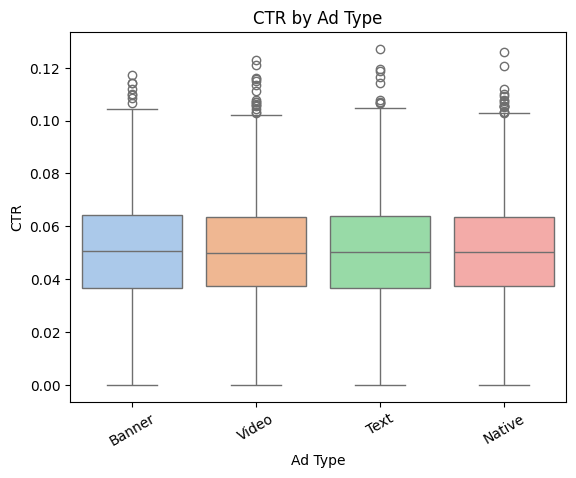

In [ ]:
# THis has some interesting stuff... Hmm
sns.boxplot(data=df, x='Gender', y='Income', palette='pastel')
plt.title("Income by Gender")
plt.show()

sns.boxplot(data=df, x='Ad Type', y='CTR', palette='pastel')
plt.title("CTR by Ad Type")
plt.xticks(rotation=30)
plt.show()


C:\Users\n0308g\AppData\Local\Temp\1\ipykernel_21268\1781857625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Click Month', palette='pastel', order=df['Click Month'].value_counts().index)


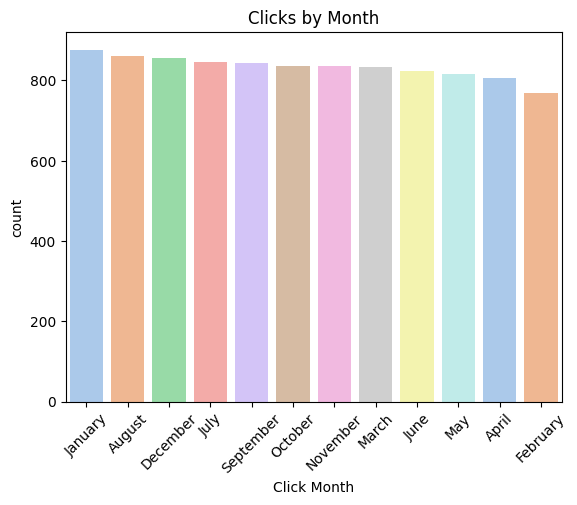

In [ ]:
# I like this because now I have more time series data, and I can see when there is more clicks per month.
df['Click Time'] = pd.to_datetime(df['Click Time'])
df['Click Hour'] = df['Click Time'].dt.hour
df['Click Month'] = df['Click Time'].dt.month_name()

sns.countplot(data=df, x='Click Month', palette='pastel', order=df['Click Month'].value_counts().index)
plt.title("Clicks by Month")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.info()
# notice we have a datatime64 Dtype now, and then there are two new columns since we extracted data from click time.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Age              10000 non-null  int64         
 1   Gender           10000 non-null  object        
 2   Income           10000 non-null  float64       
 3   Location         10000 non-null  object        
 4   Ad Type          10000 non-null  object        
 5   Ad Topic         10000 non-null  object        
 6   Ad Placement     10000 non-null  object        
 7   Clicks           10000 non-null  int64         
 8   Click Time       10000 non-null  datetime64[ns]
 9   Conversion Rate  10000 non-null  float64       
 10  CTR              10000 non-null  float64       
 11  Click Hour       10000 non-null  int32         
 12  Click Month      10000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(6)
memory usage: 976.7+ KB


In [16]:
print(df.groupby('Gender')[['Clicks', 'CTR', 'Conversion Rate']].mean())
print(df.groupby('Ad Type')[['Clicks', 'CTR', 'Conversion Rate']].mean())

          Clicks       CTR  Conversion Rate
Gender                                     
Female  5.030540  0.050767         0.201616
Male    5.035700  0.050153         0.203369
Other   5.006654  0.050425         0.199294
           Clicks       CTR  Conversion Rate
Ad Type                                     
Banner   5.014062  0.050403         0.200075
Native   5.079513  0.050441         0.204576
Text     5.049513  0.050205         0.201899
Video    4.980884  0.050647         0.202512
